<a href="https://colab.research.google.com/github/tsabitanajma/Heart-Attack-Prediction-with-Machine-Learning/blob/main/Heart_Attack_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1 - Practical Machine Learning**

Nama  : Tsabita Bahiratu Najma

No.    : 16

## About Dataset

This dataset describes the contents of the heart-disease directory. It contains 76 attributes, but all published experiments
refer to using a subset of 14 of them. The "goal" field refers to the presence of heart disease
in the patient. It is integer valued from 0 (no presence) to 4.

Resource: https://www.kaggle.com/datasets/imnikhilanand/heart-attack-prediction

## Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [ ]:
data = pd.read_csv("data.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [ ]:
data.rename(columns={'num       ': 'num'}, inplace=True)

In [ ]:
print(data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


## Exploratory Data Analysis

In [ ]:
#Summary of DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    object 
 4   chol      294 non-null    object 
 5   fbs       294 non-null    object 
 6   restecg   294 non-null    object 
 7   thalach   294 non-null    object 
 8   exang     294 non-null    object 
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    object 
 11  ca        294 non-null    object 
 12  thal      294 non-null    object 
 13  num       294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


**Summary of The DataFrame:**
* The dataset contains 294 rows and 14 columns.
* The data types include integer (int64), float (float64), and object (object).
* There are no missing values since all columns have 294 non-null values.
* The dataset size is approximately 32.3 KB.
* The DataFrame shows there are no null values but a closer look at the loaded dataset shows columns with (?) values

In [ ]:
#Convert the ? entries to nan
data = data.replace('?', float('nan'), inplace=False)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0


In [ ]:
#Check missing values
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,1
chol,23
fbs,8
restecg,1
thalach,1
exang,1
oldpeak,0


* "ca" contains 291 missing values.

* "thal" contains 266 missing values.

* "slope" contains 190 missing values.

* "chol" contains 23 missing values.

* "fbs" contains 8 missing values.

* Other columns ("trestbps", "restecg", "thalach", "exang") have only 1 missing value.

## Handling Missing Value

1. More than 75% Missing Values: If a column has more than 75% missing values, it is usually removed because too much information is lost, making it difficult to recover through imputation.

2. Below 75% Missing Values: If missing values are below 75%, it is recommended to use imputation methods such as mean, median, mode, or advanced techniques.

In [ ]:
missing_percentage = data.isnull().sum() / len(data) * 100
print(missing_percentage)

age          0.000000
sex          0.000000
cp           0.000000
trestbps     0.340136
chol         7.823129
fbs          2.721088
restecg      0.340136
thalach      0.340136
exang        0.340136
oldpeak      0.000000
slope       64.625850
ca          98.979592
thal        90.476190
num          0.000000
dtype: float64


* Columns like trestbps, restecg, thalach, exang, fbs, and chol have very few missing values (< 8%) which can be handled by imputation.
* Slope (64.63%) can be handled by imputation.
* ca (98.98%) and thal (90.48%) have too high percentage of missing values which consider to drop these columns.

In [ ]:
data_new = data.drop(columns=['ca', 'thal'])
data_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,0


In [ ]:
from sklearn.impute import KNNImputer

fill_knn = data_new.copy()

#Identify numerical and categorical columns with missing values
numerical_missing_data = data_new[['trestbps', 'thalach', 'chol']]
categorical_missing_data = data_new[['fbs', 'restecg', 'exang', 'slope']]

knn_imputer_numerical = KNNImputer(n_neighbors=5, weights="uniform")
knn_imputer_categorical = KNNImputer(n_neighbors=5, weights="uniform")

#Impute missing values
numerical_filled = knn_imputer_numerical.fit_transform(numerical_missing_data)
categorical_filled = knn_imputer_categorical.fit_transform(categorical_missing_data)

numerical_filled_data = pd.DataFrame(numerical_filled, columns=numerical_missing_data.columns)
categorical_filled_data = pd.DataFrame(categorical_filled, columns=categorical_missing_data.columns)

categorical_filled_data = categorical_filled_data.round(0).astype(int)

data_new.update(numerical_filled_data)
data_new.update(categorical_filled_data)

print(data_new.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64


In [ ]:
data_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,28,1,2,130.0,132.0,0,2,185.0,0,0.0,1,0
1,29,1,2,120.0,243.0,0,0,160.0,0,0.0,2,0
2,29,1,2,140.0,261.8,0,0,170.0,0,0.0,2,0
3,30,0,1,170.0,237.0,0,1,170.0,0,0.0,1,0
4,31,0,2,100.0,219.0,0,1,150.0,0,0.0,1,0


## Handling Outliers

In [ ]:
#convert columns to numeric data types
data_new['trestbps'] = data_new['trestbps'].astype(int)
data_new['thalach'] = data_new['thalach'].astype(int)
data_new['chol'] = data_new['chol'].astype(float)

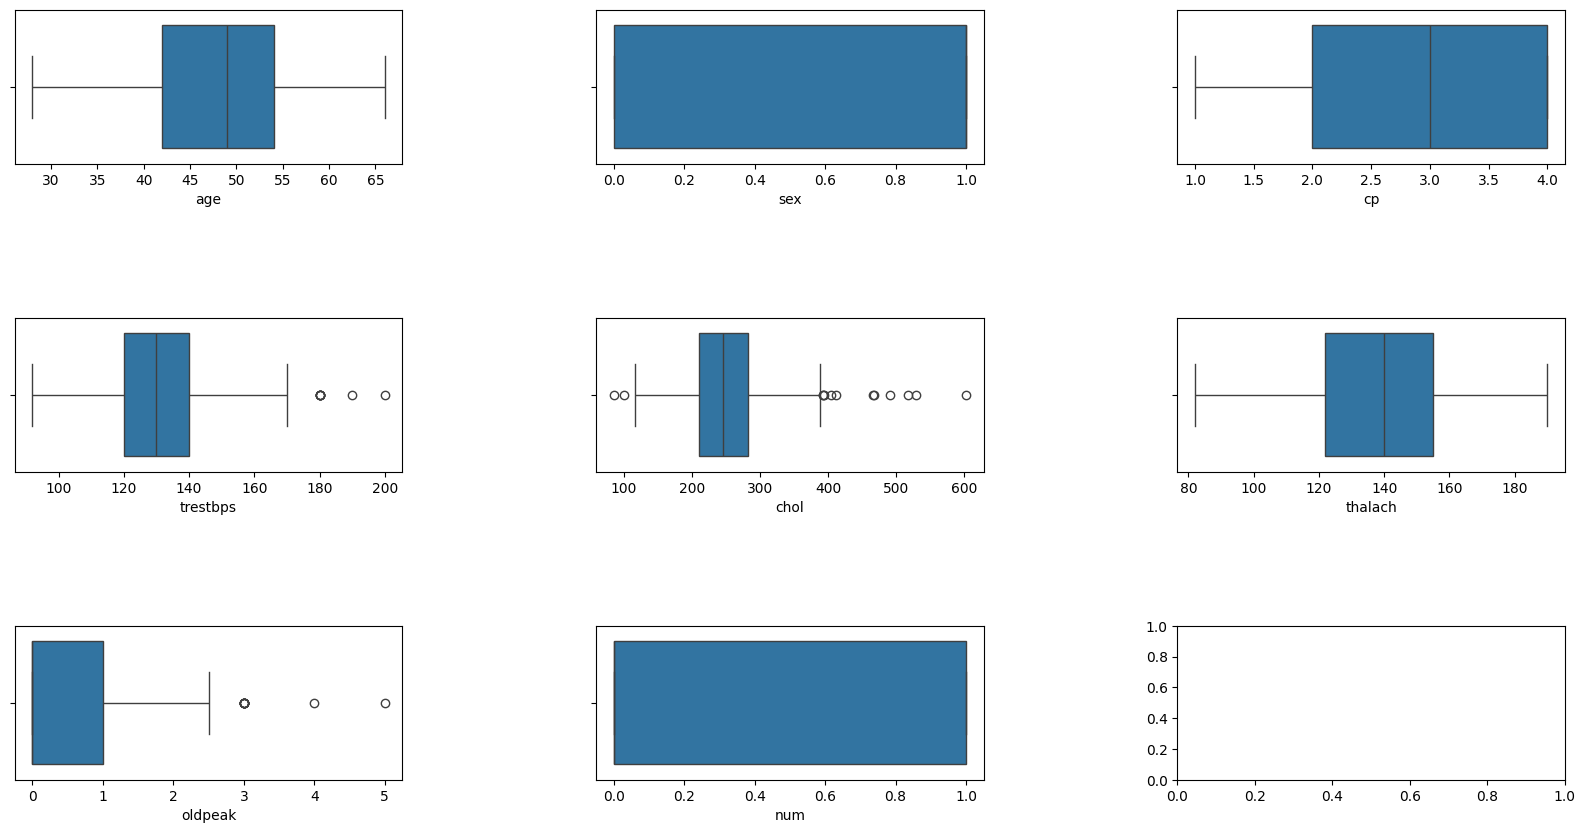

In [ ]:
numerical = data_new.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(3,3,figsize = (20,10))
fig.subplots_adjust(hspace=1, wspace=0.5)
row = 0
cols = 0
for item in numerical:
    if cols > 2:
        cols = 0
        row += 1
    ax = sns.boxplot(x=item,data=data_new,ax=axes[row, cols])
    ax.set_ylabel("")
    cols += 1

There are outliers in the columns 'trestbps', 'chol', and 'oldpeak'.










In [ ]:
#remove outliers
def winsorizing_outlier(data_new,fitur):
  data_filtered = data_new.copy()
  for col in num_features:
    data = data_filtered[col]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data_filtered[col] = data_filtered[col].clip(lower_bound,upper_bound)

  return data_filtered

num_features = ['trestbps', 'chol', 'oldpeak']
data_clean = winsorizing_outlier(data_new,num_features)

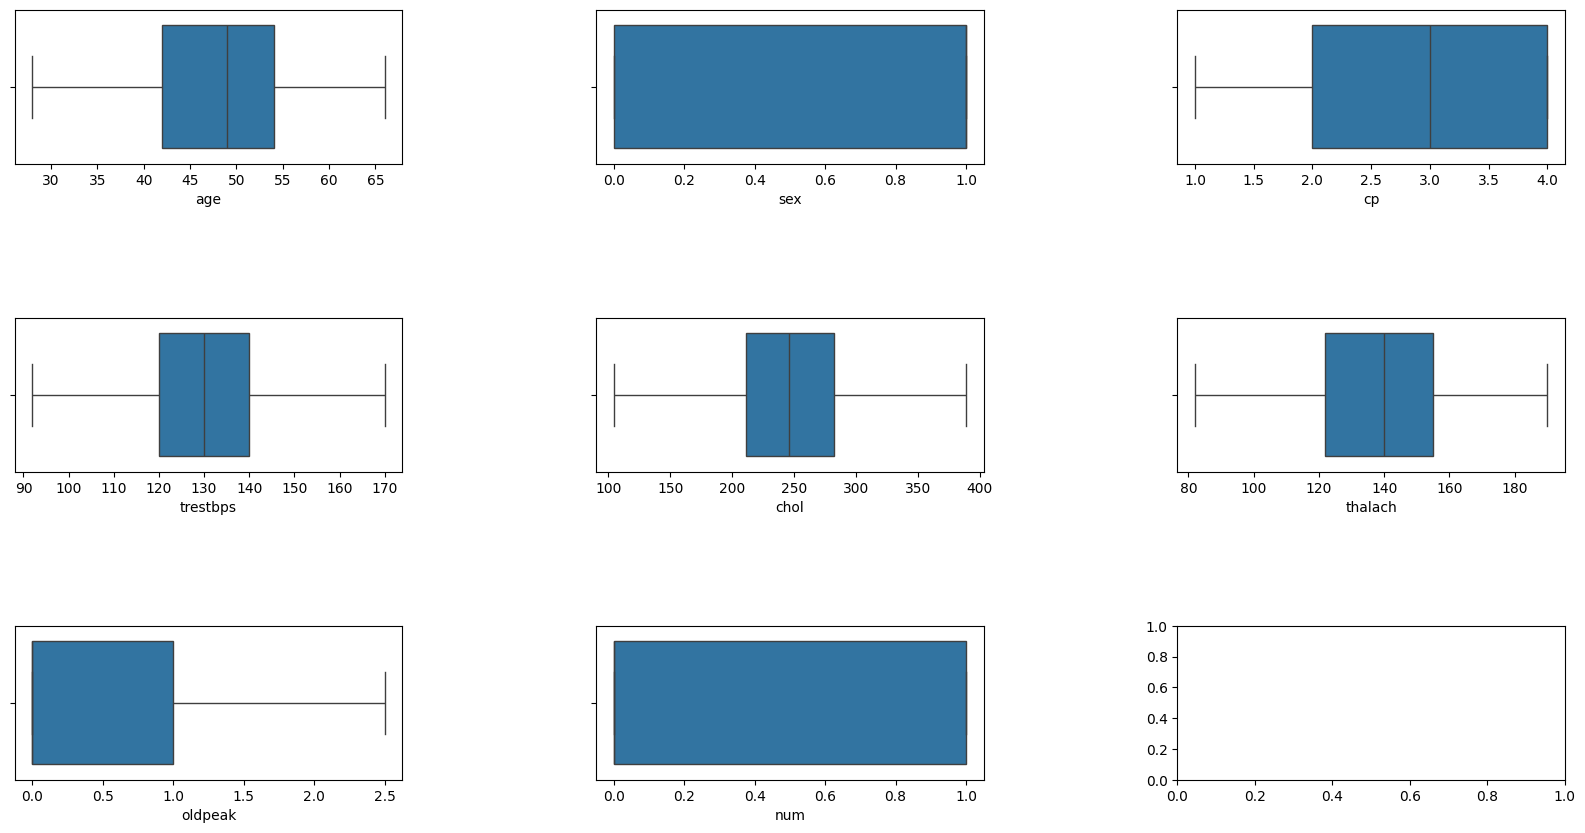

In [ ]:
#check outliers
numerical = data_clean.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(3,3,figsize = (20,10))
fig.subplots_adjust(hspace=1, wspace=0.5)
row = 0
cols = 0
for item in numerical:
    if cols > 2:
        cols = 0
        row += 1
    ax = sns.boxplot(x=item,data=data_clean,ax=axes[row, cols])
    ax.set_ylabel("")
    cols += 1

## Labelling Categoric Columns

In [ ]:
#Convert categoric columns into numerical data type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']

for col in categorical_cols:
    data_new[col] = le.fit_transform(data_new[col])

In [ ]:
#Split data into train and test
from sklearn.model_selection import train_test_split

X = data_new.drop('num', axis=1)
y = data_new['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(235, 11)
(59, 11)
(235,)
(59,)


## Check Imbalance Data

In [ ]:
y_train.value_counts()

,count
num,
0,150
1,85


In [ ]:
#use smote
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
#New proportion
y_train_smote.value_counts()

,count
num,
0,150
1,150


## Standardized Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_sd = scaler.fit_transform(X_train)
X_test_sd = scaler.transform(X_test)

# Modelling

## Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_sd, y_train)

GaussianNB()

In [ ]:
#Evaluation
from sklearn.metrics import classification_report
y_pred_nb = nb_model.predict(X_test_sd)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        38
           1       0.72      0.86      0.78        21

    accuracy                           0.83        59
   macro avg       0.82      0.84      0.82        59
weighted avg       0.84      0.83      0.83        59



## Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_sd, y_train)
y_pred_tree = model_tree.predict(X_test_sd)

In [ ]:
#Evaluation
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        38
           1       0.62      0.62      0.62        21

    accuracy                           0.73        59
   macro avg       0.70      0.70      0.70        59
weighted avg       0.73      0.73      0.73        59



## KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_sd, y_train)
y_pred_knn = knn_model.predict(X_test_sd)

In [ ]:
#Evaluation
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        38
           1       0.77      0.81      0.79        21

    accuracy                           0.85        59
   macro avg       0.83      0.84      0.84        59
weighted avg       0.85      0.85      0.85        59



## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_sd, y_train)
y_pred_rf = rf_model.predict(X_test_sd)

In [ ]:
#Evaluation
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88        38
           1       0.75      0.86      0.80        21

    accuracy                           0.85        59
   macro avg       0.83      0.85      0.84        59
weighted avg       0.86      0.85      0.85        59



## SVM Model

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_sd, y_train)
y_pred_svm = svm_model.predict(X_test_sd)

In [ ]:
#Evaluation
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        38
           1       0.76      0.76      0.76        21

    accuracy                           0.83        59
   macro avg       0.82      0.82      0.82        59
weighted avg       0.83      0.83      0.83        59



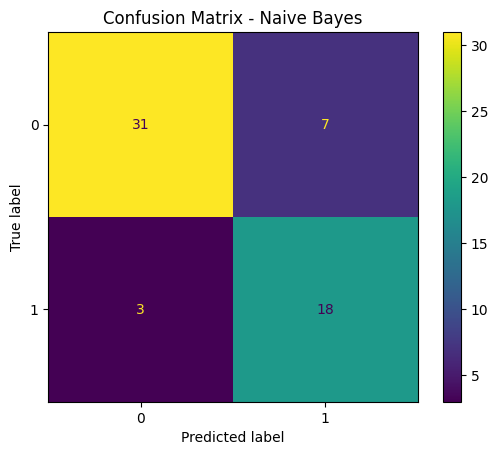

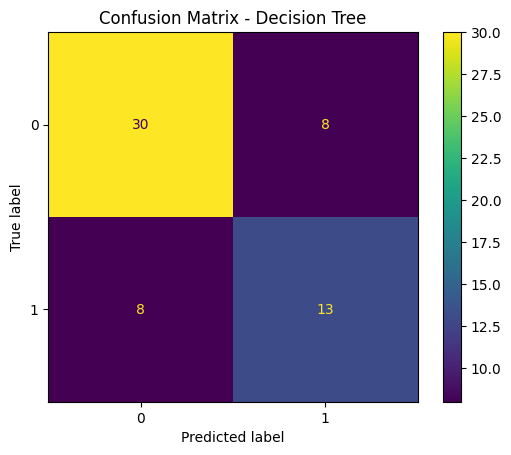

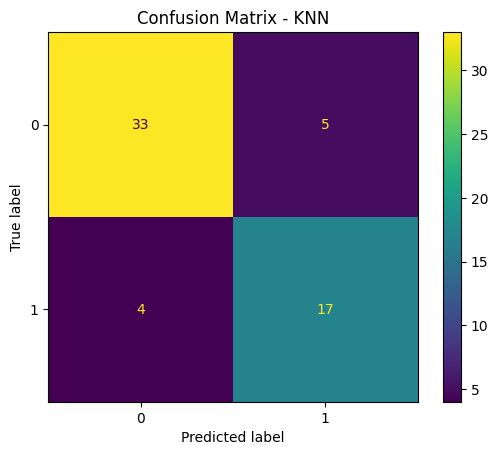

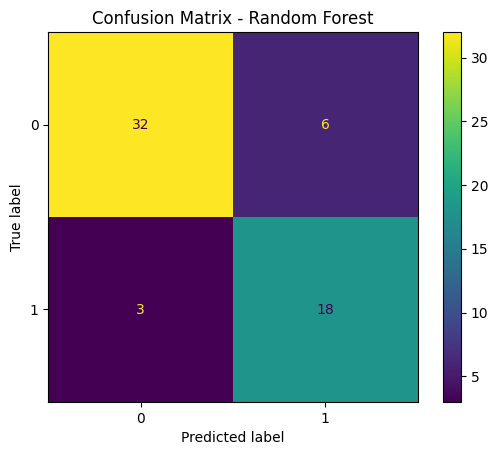

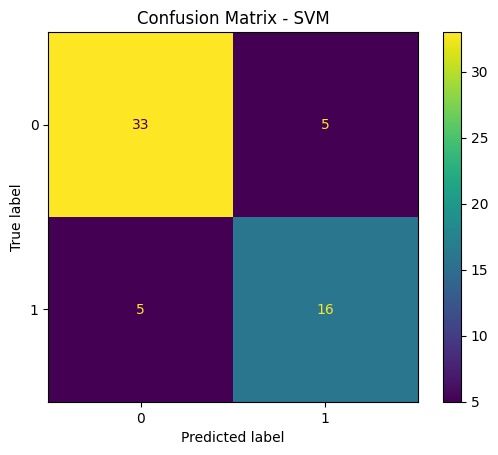

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix for Naive Bayes
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Confusion Matrix for Decision Tree
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Confusion Matrix for KNN
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
plt.title("Confusion Matrix - KNN")
plt.show()

# Confusion Matrix for Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Confusion Matrix for SVM
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.title("Confusion Matrix - SVM")
plt.show()

**Model Evaluation**
1. Naive Bayes
  *   F1 score accuracy : 0.83
2. Decision Tree
  *   F1 score accuracy : 0.73
3. KNN
  *   F1 score accuracy : 0.85
4. Random Forest
  *   F1 score accuracy : 0.85
5. SVM
  *   F1 score accuracy : 0.83


Based on the F1 score accuracy values, the best-performing model is KNN model and Random Forest model.

## Overfitting Check

In [ ]:
from sklearn.metrics import accuracy_score

train_preds_knn = knn_model.predict(X_train_sd)
train_acc_knn = accuracy_score(y_train, train_preds_knn)

test_preds_knn = knn_model.predict(X_test_sd)
test_acc_knn = accuracy_score(y_test, test_preds_knn)

print("Train Accuracy:", train_acc_knn)
print("Test Accuracy:", test_acc_knn)

Train Accuracy: 0.8978723404255319
Test Accuracy: 0.847457627118644


In [ ]:
train_preds_rf = rf_model.predict(X_train_sd)
train_acc_rf = accuracy_score(y_train, train_preds_rf)

test_preds_rf = rf_model.predict(X_test_sd)
test_acc_rf = accuracy_score(y_test, test_preds_rf)

print("Train Accuracy:", train_acc_rf)
print("Test Accuracy:", test_acc_rf)

Train Accuracy: 1.0
Test Accuracy: 0.847457627118644


Based on the train-test accuracy results, the model with the lowest overfitting due to its balanced train and test scores—is the KNN model. KNN is considered the best model.

## Conclusion

1. The dataset contains missing values of less than 75% in the columns "trestbps", "restecg", "exang", "fbs", "chol", and "slope". These were handled using KNN Imputer. Columns "ca" and "thal" had more than 75% missing values and were removed to avoid irrelevant imputation results.

2. The dataset contains outliers in the columns "trestbps", "chol", and "oldpeak". These were handled using winsorizing.

3. Categorical data were converted into numerical data using LabelEncoder.

4. The data were split into training and testing sets with an 80:20 ratio.

5. Data imbalance was addressed using SMOTE.

6. Standardized X variables data using StandardScaler.

7. After the data clean, modeling was carried out using several methods:

  * Naive Bayes: achieved an accuracy of 83%
  * Decision Tree: achieved an accuracy of 73%
  * KNN: achieved an accuracy of 85%
  * Random Forest: achieved an accuracy of 85%
  * SVM: achieved an accuracy of 83%

8. Overfitting checks were performed on the two models with the highest F1 scores and it was found that the KNN model had more balanced training and testing accuracy.

9. The best classification model based on the F1 score and balanced train-test accuracy is the **KNN model** with **F-1 score accuracy is 85%**.


In [ ]:
#Save model
import pickle
pickle.dump(knn_model, open("/content/drive/MyDrive/KNN_Model_Classification.pkl", "wb"))